In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist, cifar10, mnist

4422102/4422102 [==============================] - 1s 0us/step


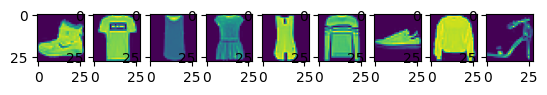

In [ ]:
(train_x,trainy),(testx,testy)=fashion_mnist.load_data()

for i in range(9):
  plt.subplot(1,9,i+1)
  plt.imshow(train_x[i])
plt.show()

#Arithmetic and logical operations


In [ ]:
images=train_x

<ipython-input-35-c86a20a48847>:19: RuntimeWarning: divide by zero encountered in divide
  plt.imshow(images[0]/images[1])
<ipython-input-35-c86a20a48847>:19: RuntimeWarning: invalid value encountered in divide
  plt.imshow(images[0]/images[1])


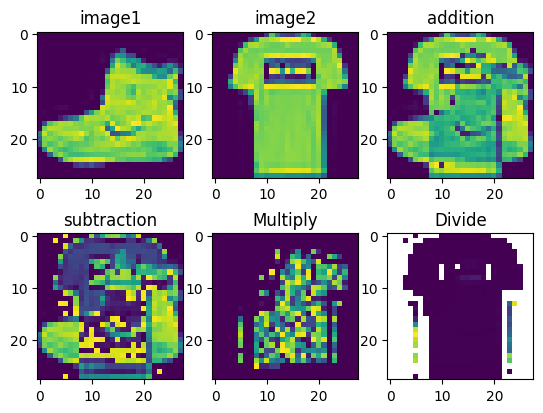

In [ ]:
#Arithmetic operations
plt.subplot(231)
plt.title("image1")
plt.imshow(images[0])
plt.subplot(232)
plt.title("image2")
plt.imshow(images[1])
plt.subplot(233)
plt.title("addition")
plt.imshow(images[0]+images[1])
plt.subplot(234)
plt.title("subtraction")
plt.imshow(images[0]-images[1])
plt.subplot(235)
plt.title("Multiply")
plt.imshow(images[0]*images[1])
plt.subplot(236)
plt.title("Divide")
plt.imshow(images[0]/images[1])
plt.show()

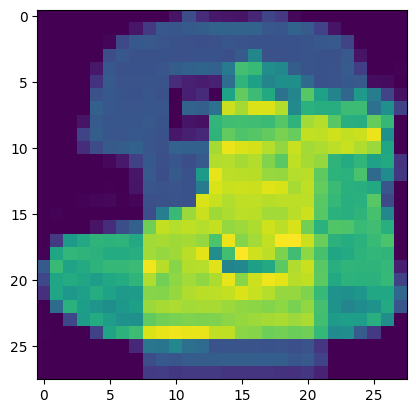

In [ ]:
#image blending
img1=images[0]
img2=images[1]
alpha=0.7
result=alpha*img1+(1-alpha)*img2
plt.imshow(result)
plt.show()

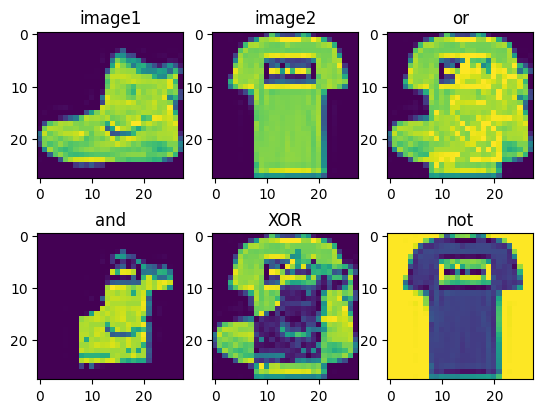

In [ ]:
#Logical operations
plt.subplot(231)
plt.title("image1")
plt.imshow(img1)
plt.subplot(232)
plt.title("image2")
plt.imshow(img2)
plt.subplot(233)
plt.title("or")
plt.imshow(np.bitwise_or(images[0],images[1]))
plt.subplot(234)
plt.title("and")
plt.imshow(np.bitwise_and(images[0],images[1]))
plt.subplot(235)
plt.title("XOR")
plt.imshow(cv2.bitwise_xor(images[0],images[1]))
plt.subplot(236)
plt.title("not")
plt.imshow(cv2.bitwise_not(images[1]))
plt.show()

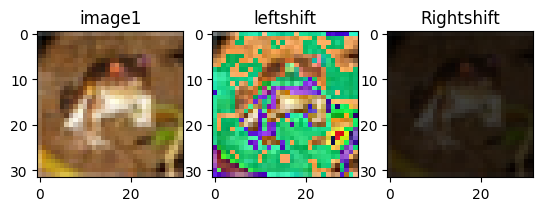

In [ ]:
#Bitwise operations
plt.subplot(131)
plt.title("image1")
plt.imshow(img1)
plt.subplot(132)
plt.title("leftshift")
plt.imshow(np.left_shift(img1,1))
plt.subplot(133)
plt.title("Rightshift")
plt.imshow(np.right_shift(img1,2))

#image croppping


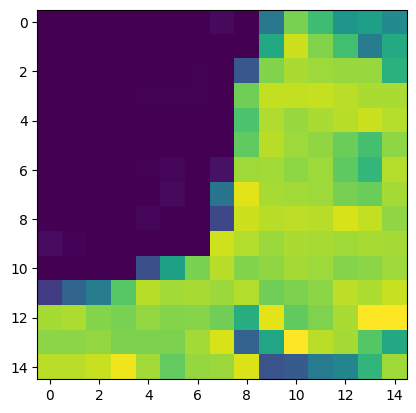

In [ ]:
x,y,h,w=5,5,15,15
crop=images[0]
crop=crop[x:x+w,y:y+h]
plt.imshow(crop)

#Digital negative

In [ ]:
def digital_negative(img):
   neg=[]
   for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      s=256-1-img[i][j]
      temp.append(s)
    neg.append(temp)
   return np.array(neg)

In [ ]:
images=train_x
img1=images[0]

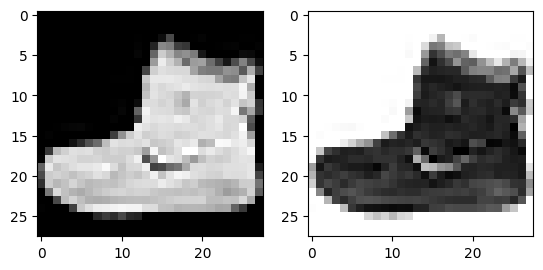

In [ ]:
plt.subplot(121)
plt.imshow(img1,cmap='gray')
plt.subplot(122)
plt.imshow(digital_negative(img1),cmap='gray')

#thresholding


In [ ]:
def thresholding(img, threshold = 127):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
        new_img[i][j] = 255
      else:
        new_img[i][j] = 0
  return(new_img)

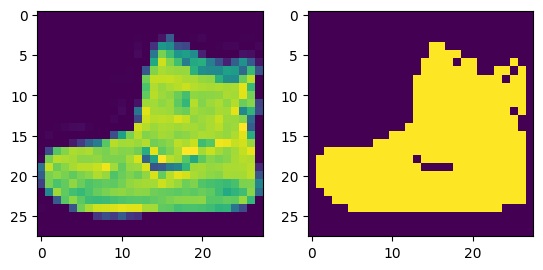

In [ ]:
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(thresholding(img1))

#gray level slicing

In [ ]:
#gray lvl slicing without background
def gls_without_bg(img,a,b):
  neg=[]
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if (img[i][j]>=a and img[i][j]<=b):
        s=255
      else:
        s=0
      temp.append(s)
    neg.append(temp)
  return np.array(neg)

In [ ]:
#gray lvl slicing with background
def gls_with_bg(img,a,b):
  neg=[]
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if (img[i][j]>=a and img[i][j]<=b):
        s=img[i][j]
      else:
        s=0
      temp.append(s)
    neg.append(temp)
  return np.array(neg)

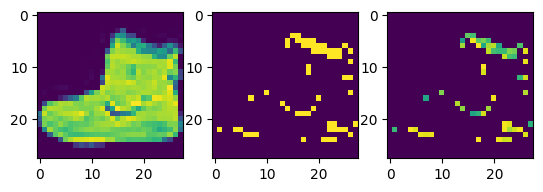

In [ ]:
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(gls_without_bg(img1,100,180))
plt.subplot(133)
plt.imshow(gls_with_bg(img1,100,180))

#Contrast stretching, log transform, power law transform




In [ ]:
(train_x,trainy),(testx,testy)=cifar10.load_data()
img1=train_x[0]

170498071/170498071 [==============================] - 11s 0us/step


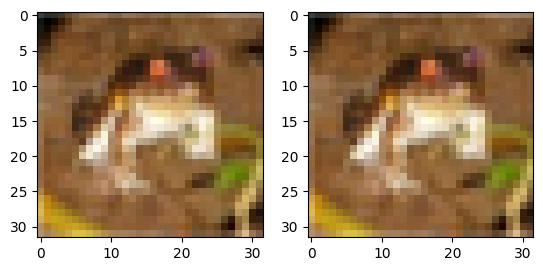

In [ ]:
def contrast_stretching(img):
  minval = np.min(img)
  maxval = np.max(img)
  stretched = ((img - minval)/(maxval - minval))*255
  return stretched.astype(np.uint8)

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(contrast_stretching(img1))

<ipython-input-62-722583e444c1>:3: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
<ipython-input-62-722583e444c1>:4: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


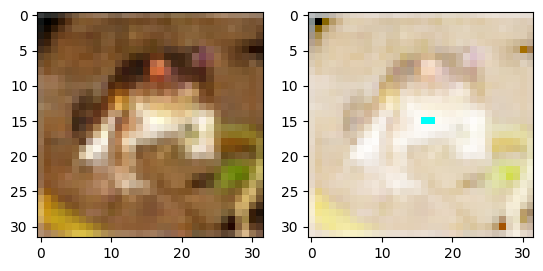

In [ ]:
def log_transformation(image):
  c  = 255 / np.log(1 + np.max(image))
  log_image = c * (np.log(image + 1))
  log_image = np.array(log_image, dtype = np.uint8)
  return log_image

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(log_transformation(img1))

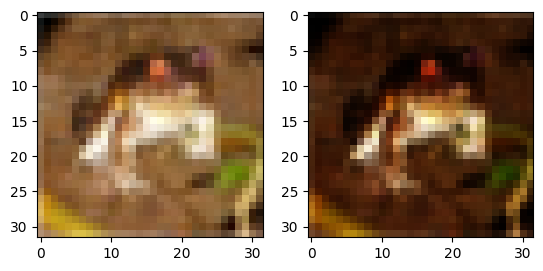

In [ ]:
def power_law_transform(img, gamma):
  powerlaw=np.array(255*(img/255)**gamma,dtype='uint8')
  return powerlaw

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(power_law_transform(img1,2.2))

#Histogram Equalization


In [ ]:
(train_x,trainy),(testx,testy)= fashion_mnist.load_data()
img1=train_x[0]

In [ ]:
def pixel_freq(image):
  pixel_frequency = np.zeros(256)
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      pixel_val = image[row][col]
      pixel_frequency[pixel_val] += 1
  return(pixel_frequency)

<BarContainer object of 256 artists>

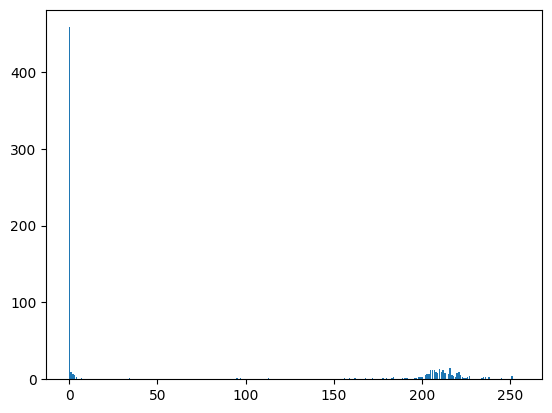

In [ ]:
count=pixel_freq(img1)
plt.bar(range(256),count)

In [ ]:
L=np.max(img1)-1
pixel_pdf = count/np.sum(count)

In [ ]:
pixel_cumsum = np.cumsum(pixel_pdf)

In [ ]:
L=np.max(img1)-1
bits_cumsum = (L-1)*pixel_cumsum
pixel_map = np.fix(bits_cumsum).astype(int)

<BarContainer object of 256 artists>

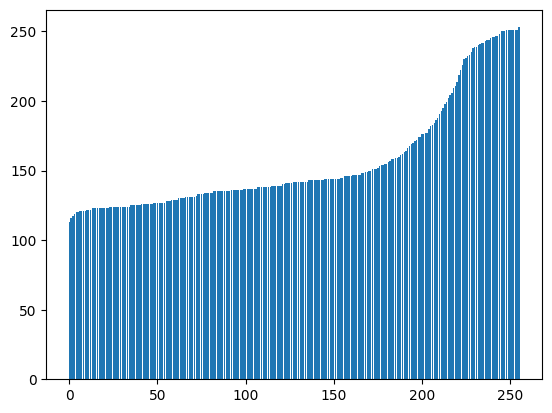

In [ ]:
plt.bar(range(256),pixel_map)

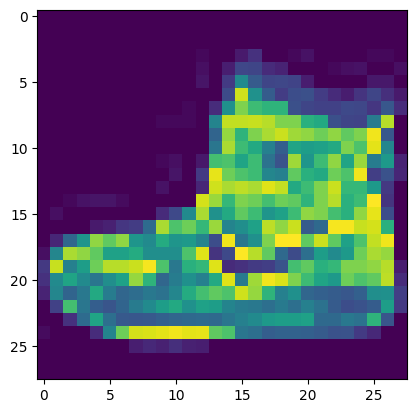

In [ ]:
output=np.zeros(img1.shape)
h,w=output.shape
for row in range(h):
  for col in range(w):
    pixel_val = img1[row][col]
    output[row][col] = pixel_map[pixel_val]

plt.imshow(output)

# Smoothing Operators
1. Add Gaussian Noise, Remove using Averaging Filter  
2. Add Salt & Pepper Noise, Remove using Median Filter

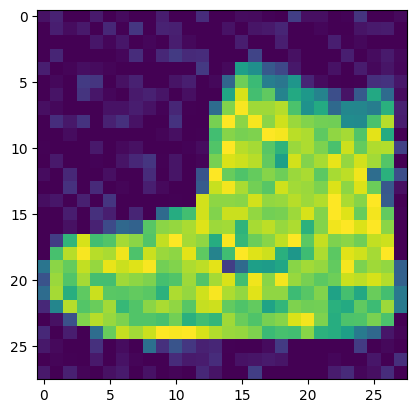

In [ ]:
mean = 0
std_dev = 20
row, column = img1.shape
gaussian_noise = np.random.normal(mean, std_dev, (row, column))
noisy_image = np.zeros_like(img1, dtype='uint8')

for i in range(row):
  for j in range(column):
    noisy_pixel = int(img1[i][j]) + int(gaussian_noise[i][j])
    if noisy_pixel > 255:
      noisy_pixel = 255
    elif noisy_pixel < 0:
      noisy_pixel = 0
    noisy_image[i][j] = noisy_pixel
plt.imshow(noisy_image)

In [ ]:
mask_size = 3
mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)

In [ ]:
def filtered_image(image, mask):

  row, column = image.shape
  mask_height, mask_width = mask.shape
  filtered_image = np.zeros((row, column))
  for i in range(row - mask_height+1):
    for j in range(column - mask_width+1):
       rows = range(i, i+mask_height)
       columns = range(j, j+mask_width)
       part = image[np.ix_(rows, columns)]*mask
       filtered_image[i, j] = part.sum()

  return filtered_image

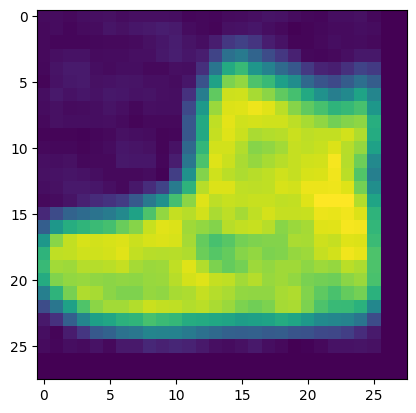

In [ ]:
removed_noise = filtered_image(noisy_image, mask)
plt.imshow(removed_noise)

In [ ]:
import random
def add_noise(img):
  rows, cols = img.shape
  img_copy = img.copy()
  no_of_pixels = random.randint(300, 8000)
  for i in range(no_of_pixels):
    x_coord = random.randint(0, cols -1)
    y_coord = random.randint(0, rows -1)
    img_copy[y_coord][x_coord] = 255

  no_of_pixels = random.randint(300, 8000)

  for i in range(no_of_pixels):
    x_coord = random.randint(0, cols -1)
    y_coord = random.randint(0, rows -1)
    img_copy[y_coord][x_coord] = 0
  return img_copy

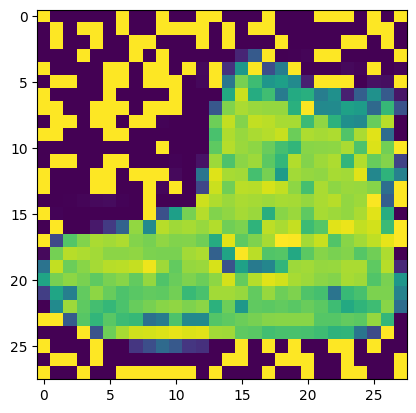

In [ ]:
noisy = add_noise(img1)

saltnpepper=img1+noisy
plt.imshow(saltnpepper)

In [ ]:
def median_filter(img):
  rows, cols = img.shape
  mask_height, mask_width = 3,3
  new  = np.zeros((rows, cols))
  for i in range(rows - mask_height + 1):
    for j in range(cols - mask_width +1):
      row = range(i, i+ mask_height)
      col = range(j, j+ mask_width)
      part  = np.sort(np.ravel(img[np.ix_(row, col)]))
      new[i][j] = part[5]
  return new

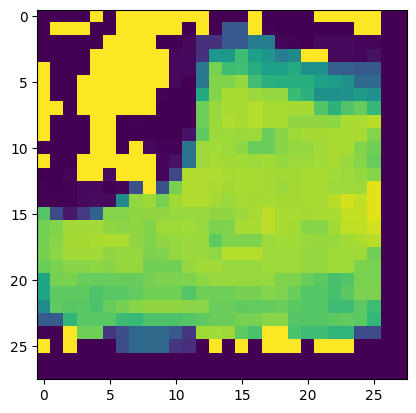

In [ ]:
new = median_filter(saltnpepper)
plt.imshow(new)

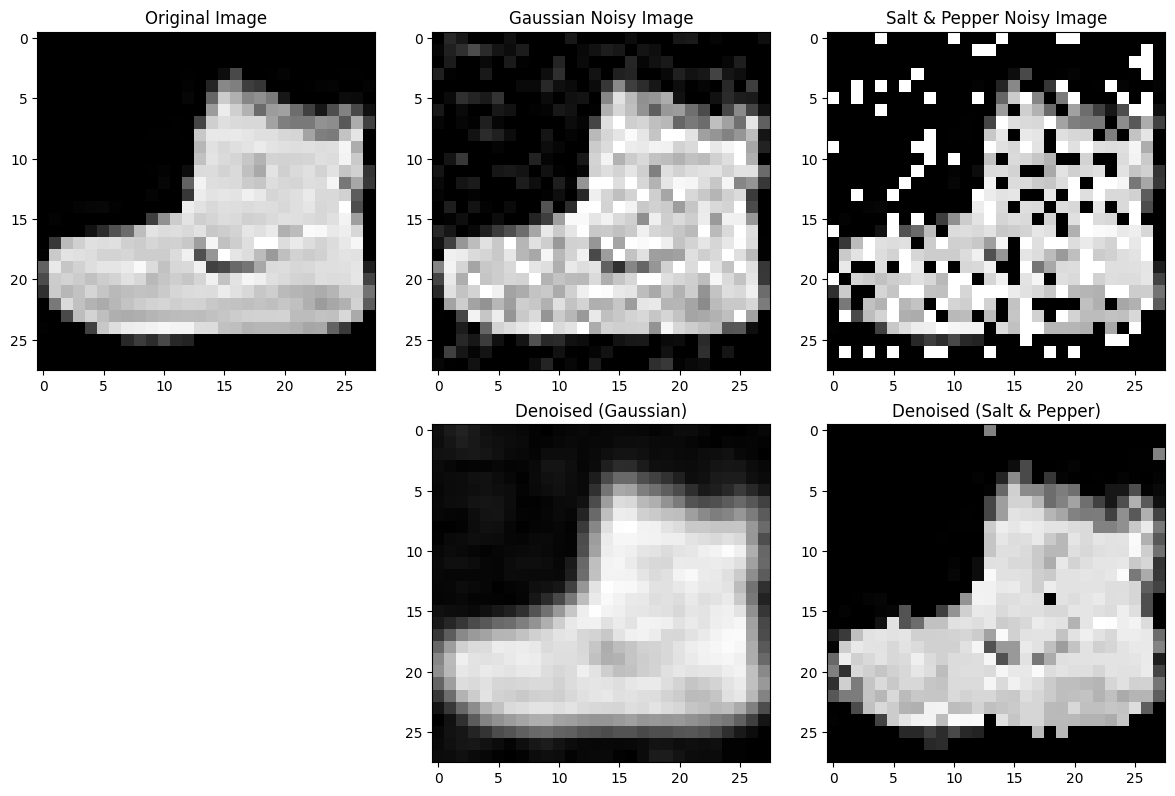

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load Fashion MNIST dataset (assuming you have it downloaded)
from tensorflow.keras.datasets import fashion_mnist

# Load data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Choose an image from the dataset
image_index = 0
original_image = train_images[image_index]

# Define functions to add noise
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image

def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.4):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255
    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

# Define functions to remove noise
def remove_gaussian_noise(image, filter_size):
    kernel = np.ones((filter_size, filter_size)) / (filter_size * filter_size)
    return convolve2d(image, kernel, mode='same', boundary='symm')

def remove_salt_pepper_noise(image, filter_size):
    noisy_image = image.copy()
    h, w = image.shape
    for i in range(h):
        for j in range(w):
            if image[i, j] == 0 or image[i, j] == 255:
                noisy_image[i, j] = np.median(image[max(0, i-1):min(h, i+2), max(0, j-1):min(w, j+2)])
    return noisy_image

# Add Gaussian noise
gaussian_noisy_image = add_gaussian_noise(original_image)

# Add Salt & Pepper noise
salt_pepper_noisy_image = add_salt_pepper_noise(original_image)

# Remove Gaussian noise using averaging filter
denoised_gaussian_image = remove_gaussian_noise(gaussian_noisy_image, filter_size=3)

# Remove Salt & Pepper noise using median filter
denoised_salt_pepper_image = remove_salt_pepper_noise(salt_pepper_noisy_image, filter_size=3)

# Visualize the images
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(232)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title("Gaussian Noisy Image")

plt.subplot(233)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title("Salt & Pepper Noisy Image")

plt.subplot(235)
plt.imshow(denoised_gaussian_image, cmap='gray')
plt.title("Denoised (Gaussian)")

plt.subplot(236)
plt.imshow(denoised_salt_pepper_image, cmap='gray')
plt.title("Denoised (Salt & Pepper)")

plt.tight_layout()
plt.show()


#High pass filter

In [ ]:
#Basic High Pass Filtering
mask = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

mask

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

def high_pass_filter(img, kernel):
    center = 3 // 2
    kernel_size = 3

    # Apply the filter using convolution
    filtered_img = np.zeros_like(img, dtype=np.float32)
    img_padded = np.pad(img, ((center, center), (center, center)), mode='constant')

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = img_padded[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.sum(window * kernel)

    return filtered_img

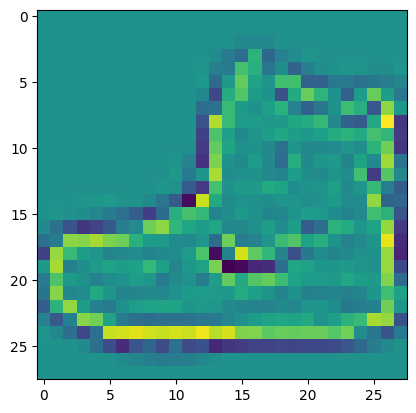

In [ ]:
high_image = high_pass_filter(img1, kernel)
plt.imshow(high_image)

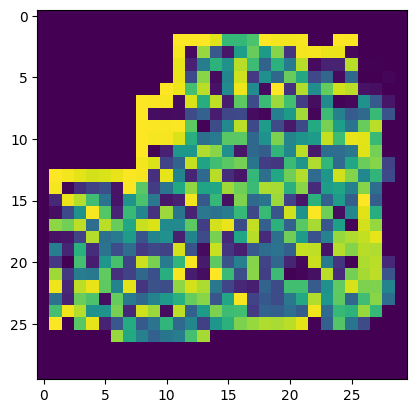

In [ ]:
#High Boost Filtering
A=2.1
mask = np.array([[-1, -1, -1],
                   [-1, A+8, -1],
                   [-1, -1, -1]])
img=img1
img_new = np.zeros([row, col])
center = 3 // 2
kernel_size = 3
img_new = np.pad(img, ((center, center), (center, center)), mode='constant')

for i in range(1, row-1):
    for j in range(1, col-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= temp
plt.imshow(img_new)

#erosion and dialation:

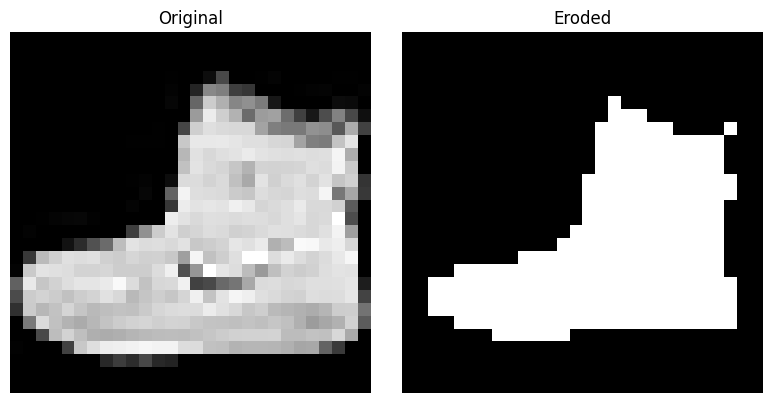

In [ ]:
from scipy.ndimage import binary_erosion
import matplotlib.pyplot as plt


def apply_erosion(image, iterations=1):
    eroded_image = binary_erosion(image,iterations=2)
    return eroded_image

eroded_image = apply_erosion(img)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded")
plt.axis('off')

plt.tight_layout()
plt.show()

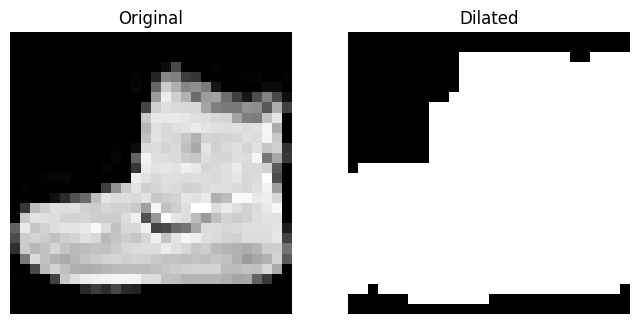

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def apply_dilation(image, kernel):
    # Pad the image to handle border pixels
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    # Initialize dilated image
    dilated_image = np.zeros_like(image)

    # Iterate over each pixel in the original image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.any(padded_image[i:i+3, j:j+3] * kernel):
                dilated_image[i, j] = 1

    return dilated_image

# Define the structuring element (kernel) for dilation (3x3 square kernel)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

dilated_image = apply_dilation(img, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated")
plt.axis('off')

plt.show()


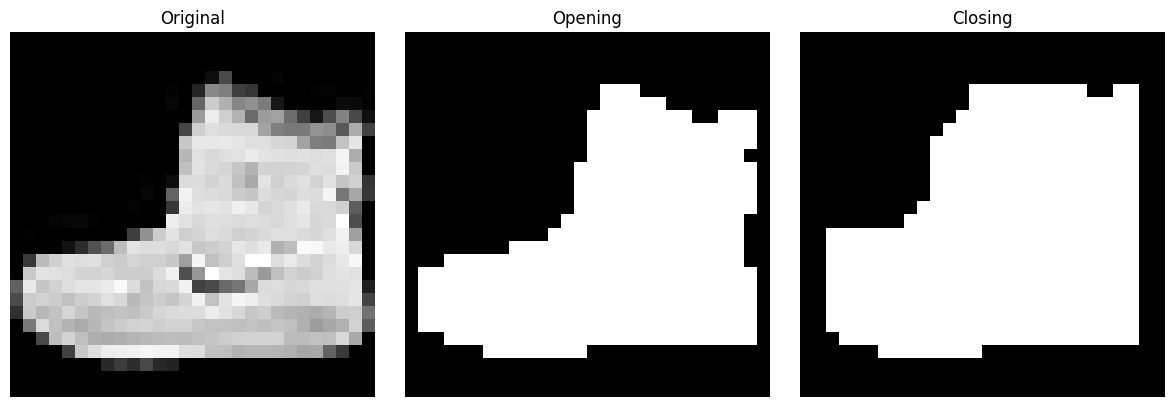

In [ ]:
#opening nad closing
import numpy as np
import matplotlib.pyplot as plt

def apply_opening(image, kernel):
    # Opening = Erosion followed by Dilation
    eroded_image = apply_erosion(image, kernel)
    opened_image = apply_dilation(eroded_image, kernel)
    return opened_image

def apply_closing(image, kernel):
    # Closing = Dilation followed by Erosion
    dilated_image = apply_dilation(image, kernel)
    closed_image = apply_erosion(dilated_image, kernel)
    return closed_image
image=img

# Define the structuring element (kernel) for morphological operations (3x3 square kernel)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

# Apply opening
opened_image = apply_opening(image, kernel)

# Apply closing
closed_image = apply_closing(image, kernel)

# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opened_image, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title("Closing")
plt.axis('off')

plt.tight_layout()
plt.show()


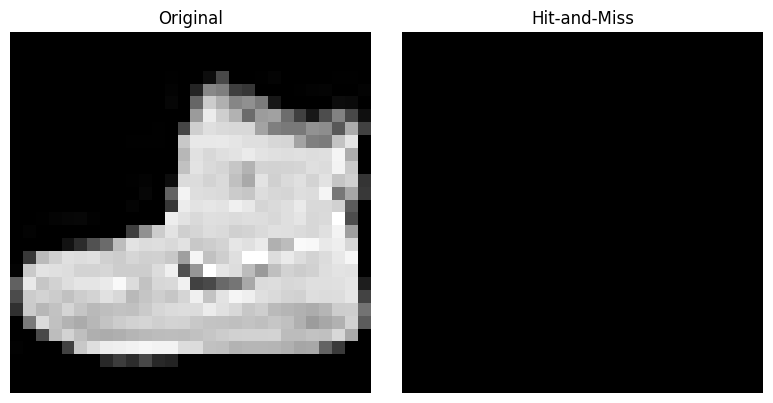

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def apply_hit_and_miss(image):
    # Define structuring elements J and K for hit-and-miss transformation
    J = np.array([[0, 1, 0],
                  [0, 1, 1],
                  [0, 0, 0]])
    K = np.array([[0, 0, 0],
                  [1, 1, 0],
                  [0, 1, 0]])

    # Apply hit-and-miss transformation
    hit_and_miss_image = np.zeros_like(image)
    for i in range(image.shape[0] - 2):
        for j in range(image.shape[1] - 2):
            if np.array_equal(image[i:i+3, j:j+3] * J, J) and np.array_equal((1 - image[i:i+3, j:j+3]) * K, K):
                hit_and_miss_image[i+1, j+1] = 1

    return hit_and_miss_image

# Apply hit-and-miss transformation
hit_and_miss_image = apply_hit_and_miss(image)

# Plotting the results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hit_and_miss_image, cmap='gray')
plt.title("Hit-and-Miss")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
kernel = np.array([[1,1,1],
                 [1,1,1],
                 [1,1,1]])

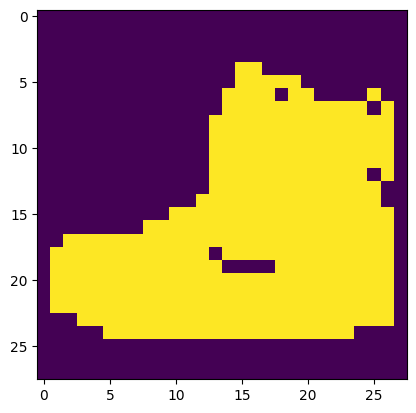

In [ ]:
bin = np.zeros_like(img1)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img1[i][j] > 120:
            bin[i][j] = 1
plt.imshow(bin)

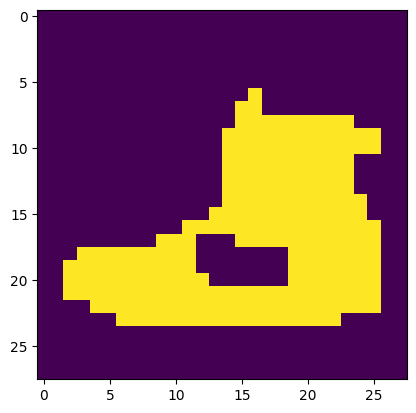

In [ ]:
def erosion(img, kernel):
    k = 3
    img1 = np.zeros_like(img)
    img_pad = np.pad(img, ((1,1), (1,1)), mode = 'constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (np.all(img_pad[i:i+k, j:j+k] == kernel)):
                img1[i][j] = 1
    return img1

e = erosion(bin, kernel)
plt.imshow(e)

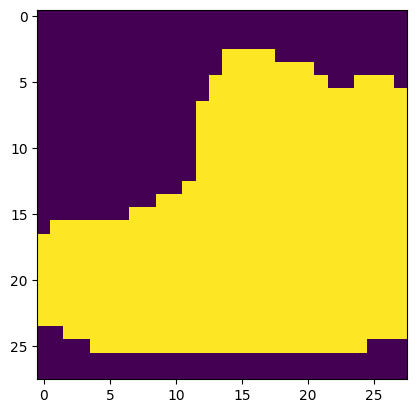

In [ ]:
#dilation
def dilation(img, kernel):
  res = np.zeros_like(img)
  image_pad = np.pad(img, ((1,1), (1,1)), mode = 'constant', constant_values = 0)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if np.any(image_pad[i:i+kernel.shape[0], j:j+kernel.shape[1]] == kernel):
        res[i][j] = 1
  return res
dilated = dilation(bin, kernel)
plt.imshow(dilated)

In [ ]:
def opening(img, kernel):
  return dilation(erosion(img, kernel), kernel)

In [ ]:
def closing(img, kernel):
  return erosion(dilation(img, kernel), kernel)

In [ ]:
open = opening(bin, kernel)
close = closing(bin, kernel)

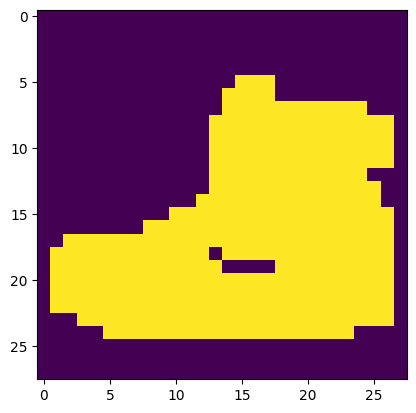

In [ ]:
plt.imshow(open)

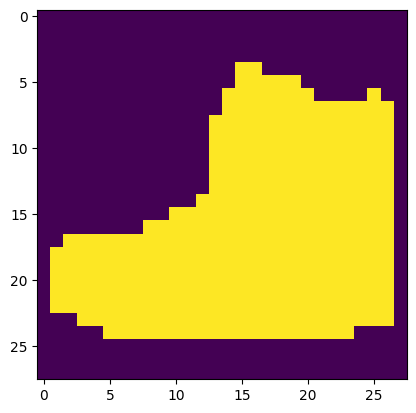

In [ ]:
plt.imshow(close)

#frequency domain

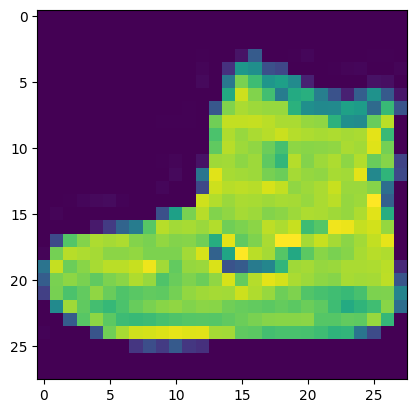

In [ ]:
from scipy.fft import fft2, fftshift, ifft2, ifftshift
(train_x,trainy),(testx,testy)=fashion_mnist.load_data()
img=train_x[0]
h,w=np.shape(img1)
shift=np.zeros([h,w])
shift=np.copy(img1)
plt.imshow(shift)

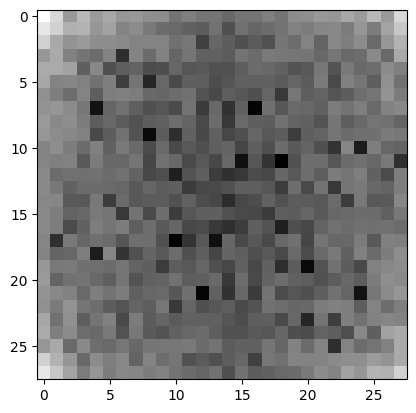

In [ ]:
F=np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')

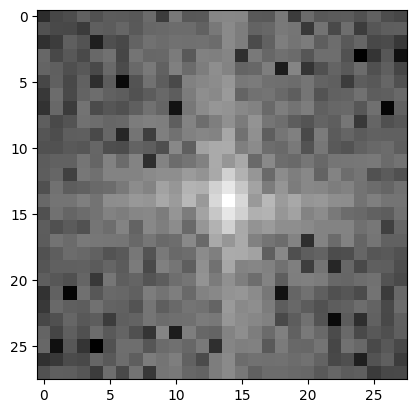

In [ ]:
Fshift=np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')

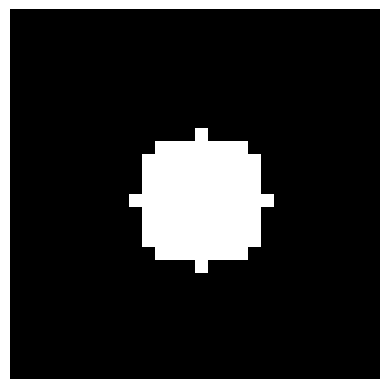

In [ ]:
M,N = img1.shape
H=np.zeros((M,N),dtype=np.float32)
D0=5
for u in range(M):
  for v in range(N):
    D=np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D<=D0:
      H[u,v]=1
    else:
      H[u,v]=0
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

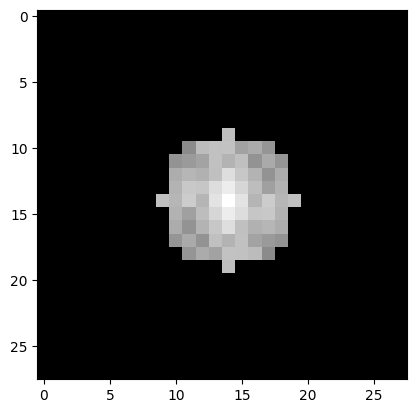

In [ ]:
Gshift=Fshift*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')

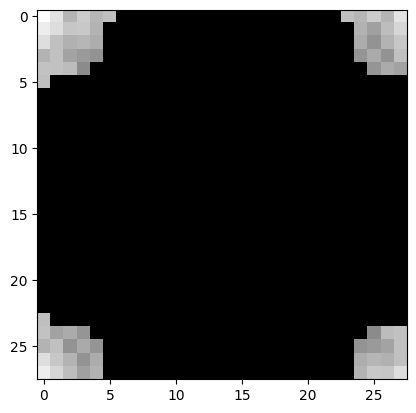

In [ ]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')

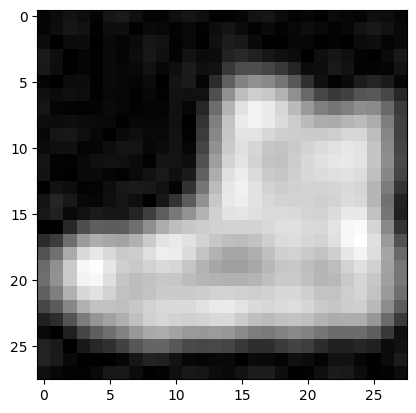

In [ ]:
g=np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')

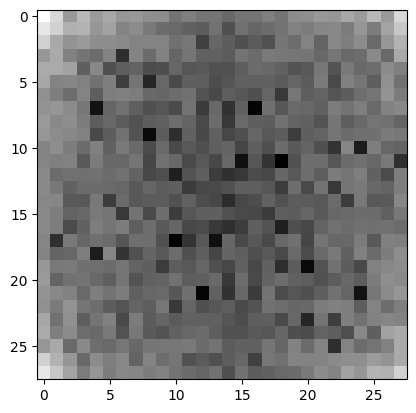

In [ ]:
#high pass
F=np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')

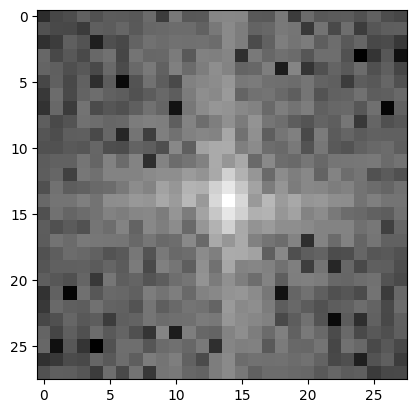

In [ ]:
Fshift=np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')

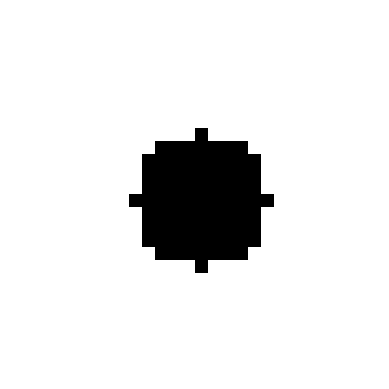

In [ ]:
#high pass filter

H=np.zeros((M,N),dtype=np.float32)
D0=5
for u in range(M):
  for v in range(N):
    D=np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D<=D0:
      H[u,v]=0
    else:
      H[u,v]=1
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

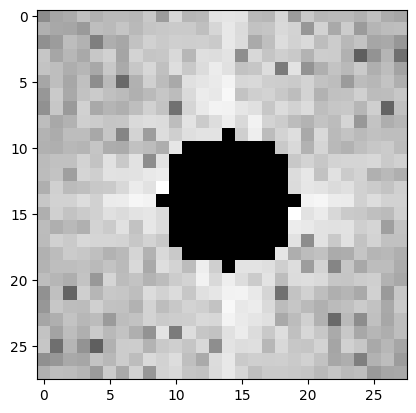

In [ ]:
Gshift=Fshift*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')

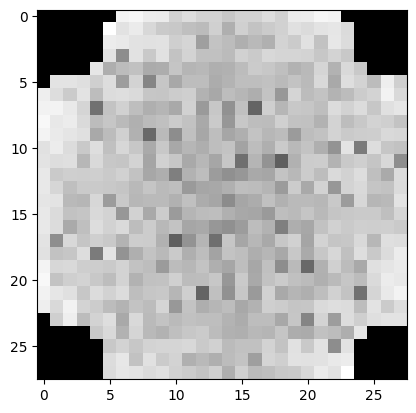

In [ ]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')

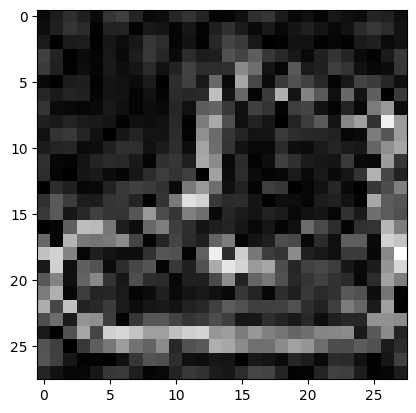

In [ ]:
g=np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')

#Region based segmentation

<ipython-input-210-b12fb11920be>:21: RuntimeWarning: overflow encountered in scalar subtract
  abs(image[current_pixel] - image[neighbor_pixel]) < threshold):


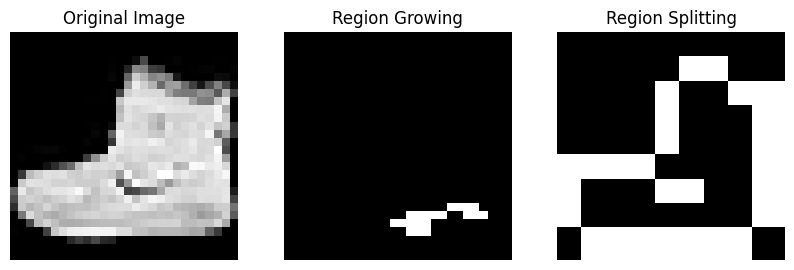

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg

def region_growing(image, seed, threshold):
    region = np.zeros_like(image)
    seed = (random.randint(0, image.shape[0] - 1), random.randint(0, image.shape[1] - 1))
    region[seed] = 1
    neighbors = [seed]

    while len(neighbors) > 0:
        current_pixel = neighbors.pop(0)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                neighbor_pixel = (current_pixel[0] + i, current_pixel[1] + j)
                if (0 <= neighbor_pixel[0] < image.shape[0] and
                    0 <= neighbor_pixel[1] < image.shape[1] and
                    region[neighbor_pixel] == 0 and
                    abs(image[current_pixel] - image[neighbor_pixel]) < threshold):
                    region[neighbor_pixel] = 1
                    neighbors.append(neighbor_pixel)

    return region

def split_regions(image, threshold):
    labeled_image = seg.slic(image, n_segments=100, compactness=10)
    split_regions = np.zeros_like(labeled_image)
    for region in np.unique(labeled_image):
        region_mask = labeled_image == region
        region_std = np.std(image[region_mask])
        if region_std > threshold:
            split_regions[region_mask] = 1
    return split_regions


image = img1


seed = (100, 100)  # Example seed point
threshold = 20     # Example intensity threshold
grown_region = region_growing(image, seed, threshold)

# Perform region splitting
split_threshold = 50  # Example standard deviation threshold
split_regions = split_regions(image, split_threshold)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grown_region, cmap='gray')
plt.title('Region Growing')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(split_regions, cmap='gray')
plt.title('Region Splitting')
plt.axis('off')

plt.show()


#Reading images

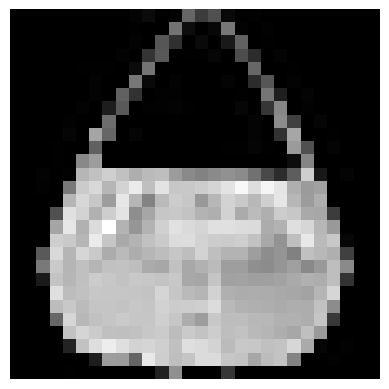

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/fashion-mnist_test.csv')
random_row = df.sample(n=1)

pixel_values = random_row.iloc[0,1:].values.astype(int)
image_array = np.array(pixel_values).reshape(28, 28)

# Plot the image
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

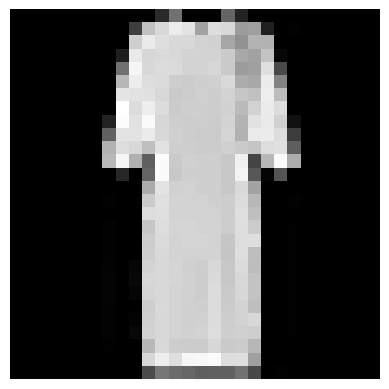

In [ ]:
random_row = df.sample(n=1)

pixel_values = random_row.iloc[0,1:].values.astype(int)
img1 = np.array(pixel_values).reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

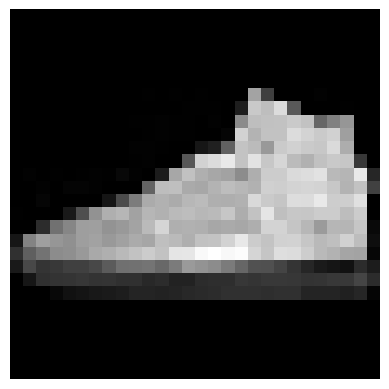

In [ ]:
random_row = df.sample(n=1)

pixel_values = random_row.iloc[0,1:].values.astype(int)
img2 = np.array(pixel_values).reshape(28, 28)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.image as mping
image=mping.imread("")


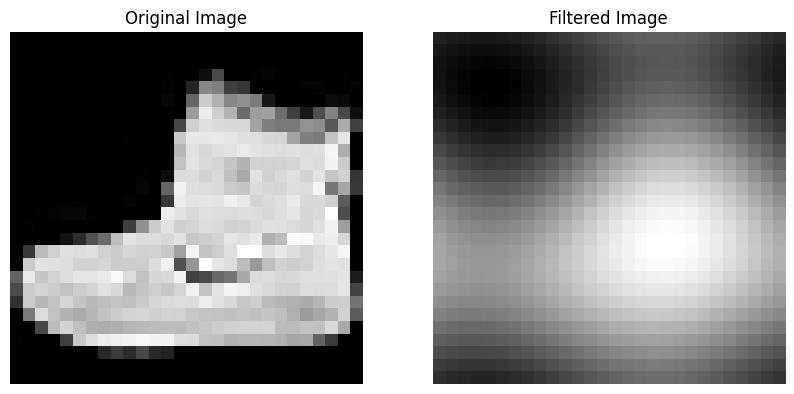

In [ ]:
#butterworth
import numpy as np
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(image, cutoff_freq, order=2):

    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Constructing the Butterworth Lowpass Filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.linspace(-center_col, center_col - 1, cols)
    y = np.linspace(-center_row, center_row - 1, rows)
    xx, yy = np.meshgrid(x, y)
    distance_from_center = np.sqrt(xx ** 2 + yy ** 2)
    butterworth_filter = 1 / (1 + (distance_from_center / cutoff_freq) ** (2 * order))

    # Applying the filter
    filtered_transform = f_transform_shifted * butterworth_filter

    # Inverse Fourier Transform
    filtered_image_shifted = np.fft.ifftshift(filtered_transform)
    filtered_image = np.fft.ifft2(filtered_image_shifted).real

    return filtered_image

image =img1

if len(image.shape) == 3:
    image = image.mean(axis=2)

cutoff_freq = 0.1
order = 2

# Apply Butterworth low-pass filter
filtered_image = butterworth_lowpass_filter(image, cutoff_freq, order)

# Plot original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()
